In [196]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
import cv2
import imutils
# %matplotlib inline
# plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})



In [197]:
src = pd.read_csv('src.csv')

In [198]:
x = src['X'].tolist() 
y = src['Y'].tolist() 
z = src['Z'].tolist() 

In [199]:
x = np.array(x)
y = np.array(y)
z = np.array(z)

In [200]:
x1 = list()
y1 = list()
z1 = list()

In [201]:
colorval = list()
for i in tqdm(range(len(x))):
    


    mag = math.sqrt(pow(x[i],2) + pow(y[i],2)+pow(z[i],2))
    
    colorval.append(mag)
    
    
    if (math.isnan(x[i]/mag)):
        x1.append(0)
        y1.append(0)
        z1.append(0)
    else:
        x1.append(x[i]/mag)
        y1.append(y[i]/mag)
        z1.append(z[i]/mag)
    
    
    

  0%|          | 0/720288 [00:00<?, ?it/s]/Users/smngi20/opt/miniconda3/envs/test-cv/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
100%|██████████| 720288/720288 [00:02<00:00, 262508.43it/s]


In [202]:
dist = list()

for i in tqdm(x1) :
    
    if i==0:
        dist.append(0)
    else:
        dist.append(10000/i)

100%|██████████| 720288/720288 [00:00<00:00, 1257279.49it/s]


In [203]:
yC = list()
zC = list()

droplist = list()

for i in tqdm(range(len(dist))):

    y_val = int(dist[i] * y1[i] + 8672.566371681416)
    z_val = int(dist[i] * z1[i] + 2824.207492795389)
    
    if y_val>0 and y_val<17500 and z_val>0 and z_val<5700:
        yC.append(y_val)
        zC.append(z_val)
    else :
        droplist.append(i)
    
 

100%|██████████| 720288/720288 [00:01<00:00, 621681.29it/s]


In [204]:
for i in droplist:
    colorval.pop(i)
    

In [205]:
np.max(yC),np.min(yC)
np.max(zC),np.min(zC)

(5666, 1)

In [206]:
x2 = list()

for i in tqdm(x1):
 
    x2.append(i*255)

100%|██████████| 720288/720288 [00:00<00:00, 1608388.47it/s]


In [207]:
x2

[207.25098096139155,
 208.25946440708842,
 209.1827635476683,
 209.96025858718104,
 210.69353204997728,
 211.3868476304143,
 207.24984198311668,
 208.2670454924967,
 209.19757925624427,
 210.03318783056903,
 210.73656210570832,
 211.4140976868312,
 207.26308505050062,
 208.2789454234387,
 209.23447525686774,
 210.0704709863025,
 210.84257326290398,
 211.51744381437618,
 207.30360668688985,
 208.35801924617934,
 209.30313022465407,
 210.1757334914235,
 210.9423235431431,
 211.6325475988777,
 207.39733288838258,
 208.46916272764264,
 209.44526505513153,
 210.33453708343748,
 211.12417967379676,
 211.81477598283152,
 207.52799388337567,
 208.63133265817225,
 209.61817515302315,
 210.4978351433263,
 211.32760658466148,
 212.02684207814752,
 207.6807862692641,
 208.82127470606622,
 209.7807576175034,
 210.70061434580705,
 211.50568393269114,
 212.25064802813014,
 207.919097875214,
 209.01949608717806,
 210.05898084129538,
 210.99392911635306,
 211.81313950873923,
 212.54501597278428,
 208.1

In [208]:
print(max(yC),min(yC))
print(max(zC),min(zC))


17425 1
5666 1


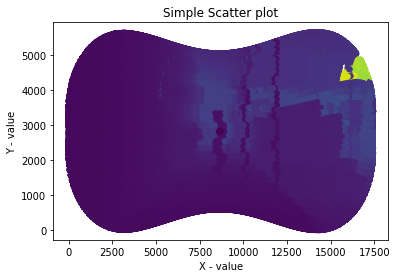

In [209]:
plt.scatter(yC,zC,c=colorval,linewidths=0.5)
plt.title('Simple Scatter plot')
plt.xlabel('X - value')
plt.ylabel('Y - value')
plt.show()

In [210]:
OUTimg = np.ones((5700,17500,3))

In [211]:
colorval = np.interp(colorval, (0,20), (0, 100))

In [212]:
bigboy = max(colorval)
bigboy

100.0

In [213]:
for i in tqdm(range(len(zC))):
    
    colorvalueMAIN = colorval[i]/bigboy
    
#     colorvalueMAIN = colorsys.hls_to_rgb(colorvalueMAIN,0.5,1)
#     r = int((colorvalueMAIN[0])*255)
#     g = int((colorvalueMAIN[1])*255)
#     b = int((colorvalueMAIN[2])*255)
    
    r = int(colorvalueMAIN *255)


    
    
#     OUTimg[zC[i]][yC[i]]=np.array([r,g,b])
    OUTimg[zC[i]][yC[i]]=np.array([r,r,r])
    
    
    

100%|██████████| 720278/720278 [00:02<00:00, 261444.29it/s]


In [214]:
# OUTimg = imutils.resize(OUTimg, width=int(OUTimg.shape[1]))

In [215]:
cv2.imwrite('yolo.png',OUTimg)

True

In [216]:
OUTimg.shape[1]

17500

In [ ]:
!open .


In [ ]:
print(r,g,b)

In [ ]:
type(OUTimg[2][2])

In [80]:
colorsys.hls_to_rgb(0.3,0.5,1)

(0.19999999999999996, 1.0, 0.0)

In [69]:
def hsl2rgb(arg): #Arg can be very long string <div>...</div>
    logging.info("HSL TO RGB")
    a=[]
    arg=arg.split()
    for index, i in enumerate(arg):
      if i.startswith("hsl"):
        H=get_number(i)
        S=get_number(arg[index+1])#Check second value
        L=get_number(arg[index+2])#Check third value
        r,g,b=colorsys.hsl_to_rgb(H/359.,L/100.,s/100.)
        RGB="rgb("+str(int(round(r*255)))+","\
            +str(int(round(r*255)))+","+str(int(round(r*255)))"
        print("RGB is ", RGB)

SyntaxError: EOL while scanning string literal (<ipython-input-69-6e7823c36dba>, line 12)

In [ ]:
print(len(yC),len(zC),len(x2))

In [ ]:
FINAL_OUTPUT = list()

In [ ]:
y_div = 1000
z_div = 1000

y_min = min(yC)
y_max = max(yC)

z_min = min(zC)
z_max = max(zC)

In [ ]:
dy = (y_max-y_min)/y_div
dz = (z_max-z_min)/z_div

yl = y_min 
yh = dy

zl = z_min
zh = dz

In [ ]:
for i in tqdm(range(y_div)):
    
    indices = np.where((yC>=yl) & (yC<=yh))
    
    yl = yh 
    yh = yl + dy 
    
    new_filter_x = np.take(x1,indices[0])
    new_filter_y = np.take(yC,indices[0])
    new_filter_z = np.take(zC,indices[0])
    
    for j in range(z_div):
        indices = np.where((new_filter_z>=zl) & (new_filter_z<=zh))
        
        new_new_filter_x = np.take(new_filter_x,indices[0])
#         new_new_filter_y = np.take(new_filter_y,indices[0])
#         new_new_filter_z = np.take(new_filter_z,indices[0])
        
        result_val = np.average(new_new_filter_x)
        
        if (math.isnan(result_val)):
            result_val=0
        
          
        FINAL_OUTPUT.append(result_val)

        
        
        zl = zh 
        zh = zl + dz
    
    

In [ ]:
FINAL_OUTPUT_1 = np.array(FINAL_OUTPUT)
FINAL_OUTPUT_1 = np.reshape(FINAL_OUTPUT_1, (y_div, z_div))



In [ ]:
FINAL_OUTPUT_1[560]

In [ ]:
from PIL import Image
new_image = Image.fromarray(FINAL_OUTPUT_1)
new_image.save('new.jpg')

In [ ]:
result1 = reduce((lambda x, y: x * y), list1) 

In [ ]:
def myfunc(n):
  return t

x = map(yC, ('apple', 'banana', 'cherry')) 

In [ ]:
# pcolormesh(X, Y, Z, **options)

print(len(x1),len(yC),len(zC))
plt.pcolormesh(yC,zC,x1)
plt.title('Simple Scatter plot')
plt.xlabel('X - value')
plt.ylabel('Y - value')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = np.random.normal(size = 1000)
plt.hist(colorval, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [ ]:
x2 = np.interp(colorval, (0,20), (0, 100))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = np.random.normal(size = 1000)
plt.hist(x2, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [ ]:
plt.scatter(yC,zC,c=x2)
plt.title('Simple Scatter plot')
plt.xlabel('X - value')
plt.ylabel('Y - value')
plt.show()